**Linear Regression Using One Variable**

https://www.youtube.com/watch?v=8jazNUpO3lQ

https://github.com/codebasics/py/blob/master/ML/1_linear_reg/

In [ ]:
!pip install pandas matplotlib sklearn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from io import StringIO

In [ ]:
HOME_PRICES_CSV_STR = """
area,price
2600,550000
3000,565000
3200,610000
3600,680000
4000,725000
"""
hdf = pd.read_csv(StringIO(HOME_PRICES_CSV_STR))
hdf.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(hdf[['area']], hdf.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.predict([[3300]])

array([628715.75342466])

In [ ]:
# y = mx + b
x = 3300 # area
m = reg.coef_ # slope
b = reg.intercept_ # y-intercept
y = m * x + b # price
m, b, y

(array([135.78767123]), 180616.43835616432, array([628715.75342466]))

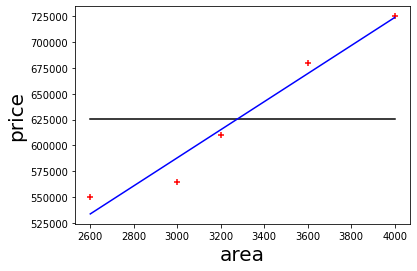

In [ ]:
%matplotlib inline
mean = [sum(hdf.price) / len(hdf.price)] * len(hdf.price)
predicted = reg.predict(hdf[['area']])
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(hdf.area, hdf.price, color='red', marker='+')
plt.plot(hdf.area, mean, color='black')
plt.plot(hdf.area, predicted, color='blue')

In [ ]:
AREAS_CSV_STR = """
area
1000
1500
2300
3540
4120
4560
5490
3460
4750
2300
9000
8600
7100
"""

adf = pd.read_csv(StringIO(AREAS_CSV_STR))
adf.head(3)

,area
0,1000
1,1500
2,2300


In [ ]:
adf['price'] = reg.predict(adf[['area']])
adf.head(3)

,area,price
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192


In [ ]:
adf.to_csv('prediction.csv')

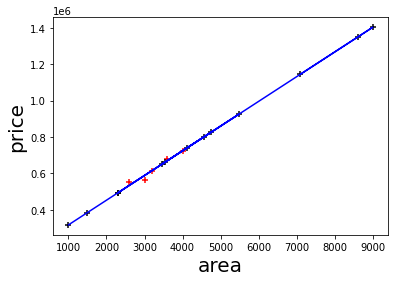

In [ ]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(hdf.area, hdf.price, color='red', marker='+')
plt.scatter(adf.area, adf.price, color='black', marker='+')
plt.plot(adf.area, adf.price, color='blue')